In [ ]:
import numpy as np #linear algebra
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
!pip install category_encoders
!pip install graphviz

In [ ]:
I from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import category_encoders as ce
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import graphviz
from sklearn import tree
#import warning

## Data Loading

In [ ]:
odf = pd.read_csv('car_evaluation.csv')
df.head()

vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

In [ ]:
col_name = ['buying','maint' ,'doors','persons','lug_boot','safty','class']
df.columns = col_name
col_name

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safty', 'class']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1727 non-null   object
 1   maint     1727 non-null   object
 2   doors     1727 non-null   object
 3   persons   1727 non-null   object
 4   lug_boot  1727 non-null   object
 5   safty     1727 non-null   object
 6   class     1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [ ]:
df.shape

(1727, 7)

In [ ]:
col_name = ['buying','maint' ,'doors','persons','lug_boot','safty','class']

for col in col_name:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())

buying
['vhigh' 'high' 'med' 'low']
buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
['vhigh' 'high' 'med' 'low']
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
['2' '3' '4' '5more']
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
['2' '4' 'more']
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
['small' 'med' 'big']
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safty
['med' 'high' 'low']
safty
med     576
high    576
low     575
Name: count, dtype: int64
class
['unacc' 'acc' 'vgood' 'good']
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
df['class'].value_counts()

class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64

<Axes: ylabel='count'>

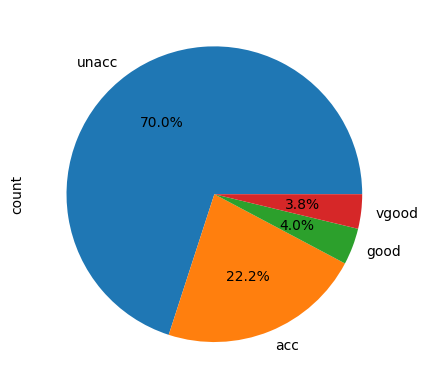

In [ ]:
df['class'].value_counts().plot(kind ='pie',autopct = '%1.1f%%')

In [ ]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safty       0
class       0
dtype: int64

In [ ]:
x = df.drop(['class'],axis=1)
y = df['class']

## Data Transformation

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying','maint' ,'doors','persons','lug_boot','safty'])

x_en = encoder.fit_transform(x)
le = LabelEncoder()
y_en = le.fit_transform(y)
x_train, x_test, y_train, y_test =train_test_split(x_en,y_en,test_size =0.33,random_state =42)

## Model

### Decision Tree

In [ ]:
pclf_gini =DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(x_test)
print("model acuuracy score with criterion gini index: {0:0.4f} ".format(accuracy_score(y_test, y_pred_gini)))

model acuuracy score with criterion gini index: 0.8053 


In [ ]:
cm =confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[ 71   0  56   0]
 [ 18   0   0   0]
 [ 11   0 388   0]
 [ 26   0   0   0]]


In [ ]:
classes_name =le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [ ]:
cm_df =pd.DataFrame(cm,index =classes_name,columns =classes_name)
cm_df

acc  good  unacc  vgood
acc     71     0     56      0
good    18     0      0      0
unacc   11     0    388      0
vgood   26     0      0      0

<Axes: >

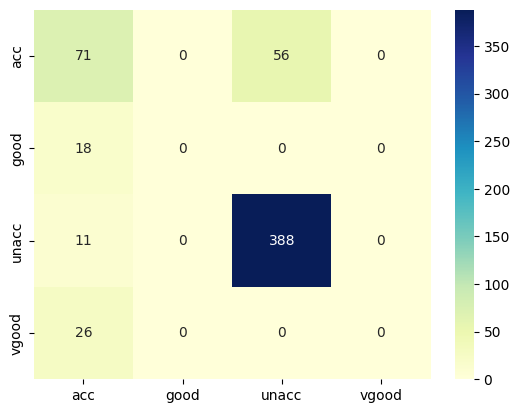

In [ ]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [ ]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.56      0.56      0.56       127
           1       0.00      0.00      0.00        18
           2       0.87      0.97      0.92       399
           3       0.00      0.00      0.00        26

    accuracy                           0.81       570
   macro avg       0.36      0.38      0.37       570
weighted avg       0.74      0.81      0.77       570



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
import imblearn
from imblearn.under_sampling import RandomUnderSampler
x =df.drop(['class'],axis=1)
y=df['class']
ran= RandomUnderSampler()
x_rs,y_rs=ran.fit_resample(x,y)

In [ ]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','persons','lug_boot','safty'])
x_en = encoder.fit_transform(x_rs)

In [ ]:
le =LabelEncoder()
y_en =le.fit_transform(y_rs)

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x_en,y_en,test_size =0.33,random_state =42)

In [ ]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_g by ini.predict(x_test)
print("model acuuracy score with criterion gini index: {0:0.4f} ".format(accuracy_score(y_test, y_pred_gini)))

model acuuracy score with criterion gini index: 0.6860 


In [ ]:
cm =confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[16  1  0  0]
 [ 0 27  0  0]
 [ 4  1 16  0]
 [ 4 17  0  0]]


In [ ]:
classes_name =le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [ ]:
cm_df =pd.DataFrame(cm,index =classes_name,columns =classes_name)
cm_df

acc  good  unacc  vgood
acc     16     1      0      0
good     0    27      0      0
unacc    4     1     16      0
vgood    4    17      0      0

<Axes: >

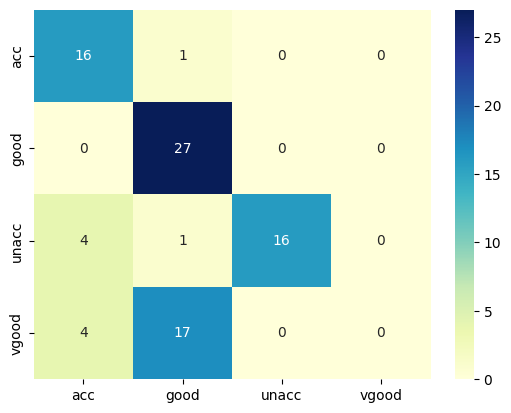

In [ ]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [ ]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
x =df.drop(['class'],axis=1)
y=df['class']
ran= RandomOverSampler()
x_rs,y_rs=ran.fit_resample(x,y)

In [ ]:
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','persons','lug_boot','safty'])
x_en = encoder.fit_transform(x_rs)

In [ ]:
le =LabelEncoder()
y_en =le.fit_transform(y_rs)

In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x_en,y_en,test_size =0.33,random_state =42)

In [ ]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=3,random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(x_test)
print("model acuuracy score with criterion gini index: {0:0.4f} ".format(accuracy_score(y_test, y_pred_gini)))

model acuuracy score with criterion gini index: 0.6410 


In [ ]:
cm =confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[176 125   0 102]
 [  0 212   0 167]
 [101  40 235  38]
 [  0   0   0 400]]


In [ ]:
classes_name =le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [ ]:
cm_df =pd.DataFrame(cm,index =classes_name,columns =classes_name)
cm_df

acc  good  unacc  vgood
acc    176   125      0    102
good     0   212      0    167
unacc  101    40    235     38
vgood    0     0      0    400

<Axes: >

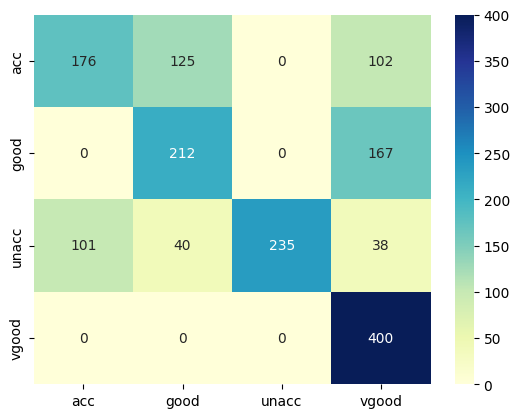

In [ ]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [ ]:
from imblearn.combine import SMOTEENN
x =df.drop(['class'],axis=1)
y=df['class']
encoder=ce.OrdinalEncoder(cols=['buying','maint','doors','persons','persons','lug_boot','safty'])
x_en = encoder.fit_transform(x)

le =LabelEncoder()
y_en =le.fit_transform(y)
ran =SMOTEENN()

x_rs, y_rs=ran.fit_resample(x_en,y_en)



In [ ]:
x_train, x_test, y_train, y_test =train_test_split(x_rs,y_rs,test_size =0.33,random_state =42)

In [ ]:
clf_gini =DecisionTreeClassifier(criterion='gini',max_depth=5,random_state=0)
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_gini = clf_gini.predict(x_test)
print("model acuuracy score with criterion gini index: {0:0.4f} ".format(accuracy_score(y_test, y_pred_gini)))

model acuuracy score with criterion gini index: 0.9304 


In [ ]:
cm =confusion_matrix(y_test, y_pred_gini)
print('confusion matrix\n\n',cm)

confusion matrix

 [[108   6  26   5]
 [  0 288   0  25]
 [  9   0 256   0]
 [  0   0   0 297]]


In [ ]:
classes_name =le.classes_.tolist()
classes_name

['acc', 'good', 'unacc', 'vgood']

In [ ]:
cm_df =pd.DataFrame(cm,index =classes_name,columns =classes_name)
cm_df

acc  good  unacc  vgood
acc    108     6     26      5
good     0   288      0     25
unacc    9     0    256      0
vgood    0     0      0    297

<Axes: >

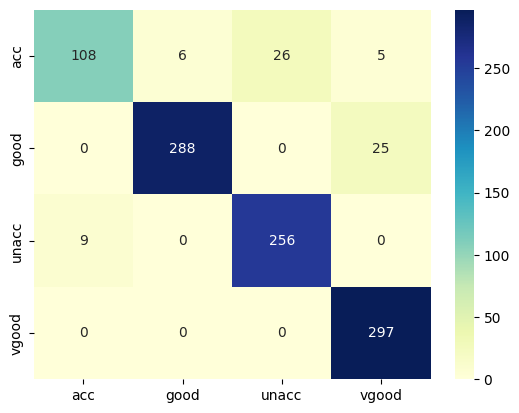

In [ ]:
sns.heatmap(cm_df,annot=True,fmt='d',cmap='YlGnBu')

In [ ]:
print(classification_report(y_test,y_pred_gini))

              precision    recall  f1-score   support

           0       0.92      0.74      0.82       145
           1       0.98      0.92      0.95       313
           2       0.91      0.97      0.94       265
           3       0.91      1.00      0.95       297

    accuracy                           0.93      1020
   macro avg       0.93      0.91      0.92      1020
weighted avg       0.93      0.93      0.93      1020



[Text(0.4375, 0.9166666666666666, 'x[5] <= 2.5\ngini = 0.73\nsamples = 2068\nvalue = [271, 629, 553, 615]'),
 Text(0.3958333333333333, 0.75, 'x[0] <= 2.5\ngini = 0.704\nsamples = 1744\nvalue = [271, 629, 229, 615]'),
 Text(0.125, 0.5833333333333334, 'x[1] <= 1.5\ngini = 0.477\nsamples = 336\nvalue = [132, 0, 204, 0]'),
 Text(0.08333333333333333, 0.4166666666666667, 'gini = 0.0\nsamples = 100\nvalue = [0, 0, 100, 0]'),
 Text(0.16666666666666666, 0.4166666666666667, 'x[5] <= 1.5\ngini = 0.493\nsamples = 236\nvalue = [132, 0, 104, 0]'),
 Text(0.08333333333333333, 0.25, 'x[4] <= 1.5\ngini = 0.473\nsamples = 133\nvalue = [51, 0, 82, 0]'),
 Text(0.041666666666666664, 0.08333333333333333, 'gini = 0.0\nsamples = 52\nvalue = [0, 0, 52, 0]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.466\nsamples = 81\nvalue = [51, 0, 30, 0]'),
 Text(0.25, 0.25, 'x[1] <= 2.5\ngini = 0.336\nsamples = 103\nvalue = [81, 0, 22, 0]'),
 Text(0.20833333333333334, 0.08333333333333333, 'gini = 0.5\nsamples = 43\nvalue 

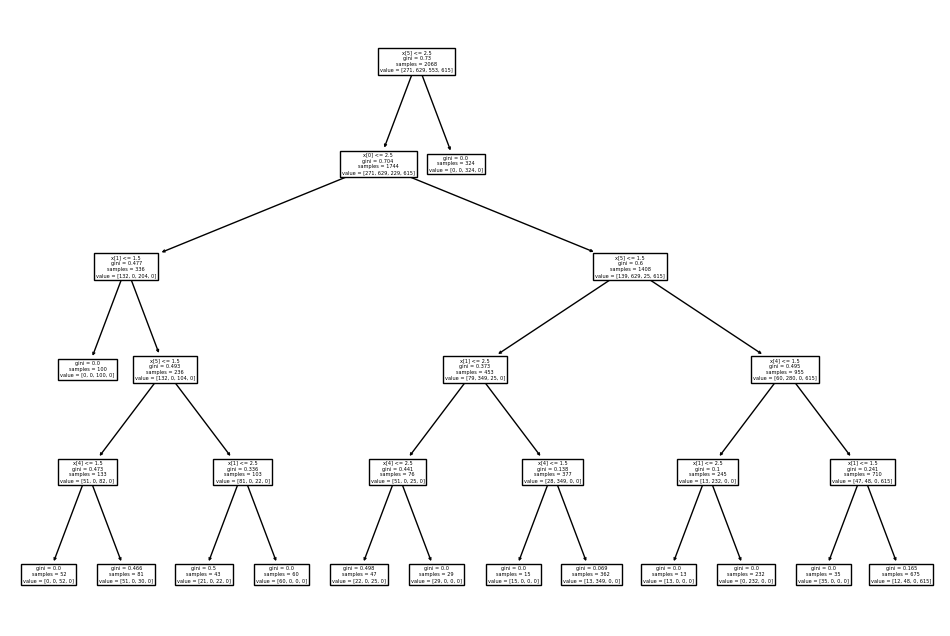

In [ ]:
plt.figure(figsize=(12,8))
from sklearn import tree
tree.plot_tree(clf_gini.fit(x_train, y_train))

In [ ]:
import graphviz

dot_data= tree.export_graphviz(clf_gini, out_file=None,feature_names=x_train.columns,class_names=classes_name,filled=True, rounded=True,special_characters=True)

graph= graphviz.Source(dot_data)

#### Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

#Create the parameter grid based on the results of random search

params={

'max_depth': [2, 3, 5, 6,8,10, 20],

'min_samples_leaf': [5, 10, 20, 50, 180],

'criterion': ["gini", "entropy"]
}

In [ ]:
grid_search = GridSearchCV(estimator=clf_gini, param_grid=params,
                  cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

The output shows that GridSearchCV is fitting 4 folds for each of the 70 candidate combinations (from the cartesian product of the params dictionary), totaling 280 fits.

After the grid search is complete, you can access the best hyperparameters using grid_search.best_params_ and the best estimator using grid_search.best_estimator_.






In [ ]:
grid_search.fit(x_train, y_train)

Fitting 4 folds for each of 70 candidates, totalling 280 fits


GridSearchCV(cv=4,
             estimator=DecisionTreeClassifier(max_depth=5, random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6, 8, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 180]},
             scoring='accuracy', verbose=1)

In [ ]:
best_par = grid_search.best_estimator_

In [ ]:
def evaluate_model(dt_classifier):

    print("Train Accuracy:",accuracy_score(y_train, dt_classifier.predict(x_train)))

    print("Train Confusion Matrix:")

    print(confusion_matrix(y_train, dt_classifier.predict(x_train)))

    print("-"*50)

    print("Test Accuracy:",accuracy_score(y_test, dt_classifier.predict(x_test)))

    print("Test Confusion Matrix:")
    print(confusion_matrix(y_test,dt_classifier.predict(x_test)))
    cm=confusion_matrix(y_test,dt_classifier.predict(x_test))
    cm_df=pd.DataFrame(cm,
                      index=classes_name,
                      columns=classes_name)
    sns.heatmap(cm_df,annot=True,fmt='d', cmap='YlGnBu')
    print(classification_report(y_test,dt_classifier.predict(x_test)))

Train Accuracy: 0.9937137330754352
Train Confusion Matrix:
[[265   6   0   0]
 [  0 629   0   0]
 [  7   0 546   0]
 [  0   0   0 615]]
--------------------------------------------------
Test Accuracy: 0.9892156862745098
Test Confusion Matrix:
[[139   5   1   0]
 [  0 313   0   0]
 [  5   0 260   0]
 [  0   0   0 297]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96       145
           1       0.98      1.00      0.99       313
           2       1.00      0.98      0.99       265
           3       1.00      1.00      1.00       297

    accuracy                           0.99      1020
   macro avg       0.99      0.98      0.99      1020
weighted avg       0.99      0.99      0.99      1020



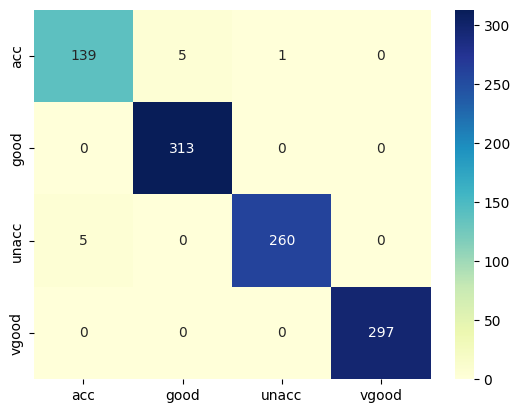

In [ ]:
evaluate_model(best_par)

In [ ]:
best_par.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=5, random_state=0)

In [ ]:
print("Test Accuracy:",accuracy_score(y_test,best_par.predict(x_test)))

Test Accuracy: 0.9892156862745098


In [ ]:
import joblib
filename='finalized_model.joblib'
joblib.dump(best_par,filename)

['finalized_model.joblib']

In [ ]:
from IPython.display import FileLink
FileLink(r'finalized_model.joblib')

/content/finalized_model.joblib

#### Explainable AI

In [ ]:
!pip install shap lime

In [ ]:
import shap

import matplotlib.pyplot as plt

#load JS visualization code to notebook
shap.initjs()

#Create the explainer

explainer=shap.TreeExplainer(best_par)

shap_values=explainer.shap_values(x_test)

Variable Importance Plot Global Interpretation


<Figure size 640x480 with 0 Axes>

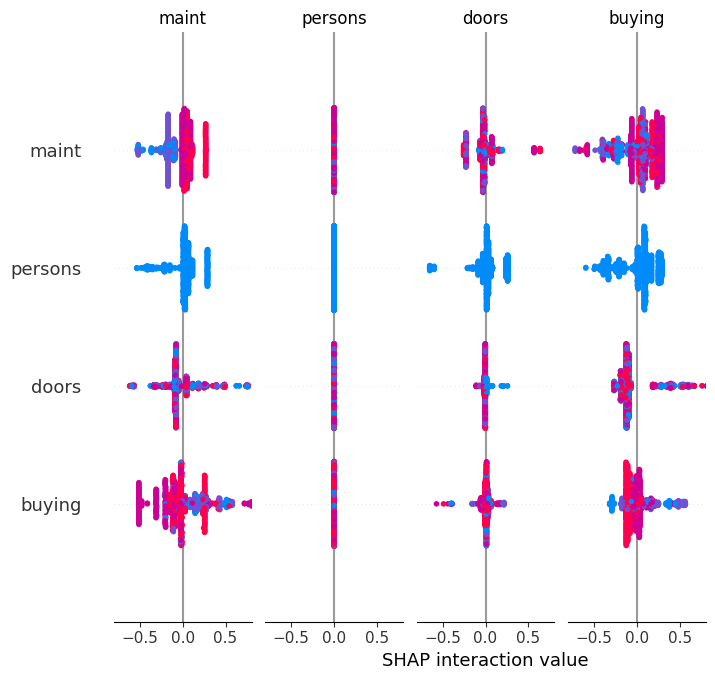

In [ ]:
print("Variable Importance Plot Global Interpretation")

figure=plt.figure()

shap.summary_plot(shap_values, x_test)

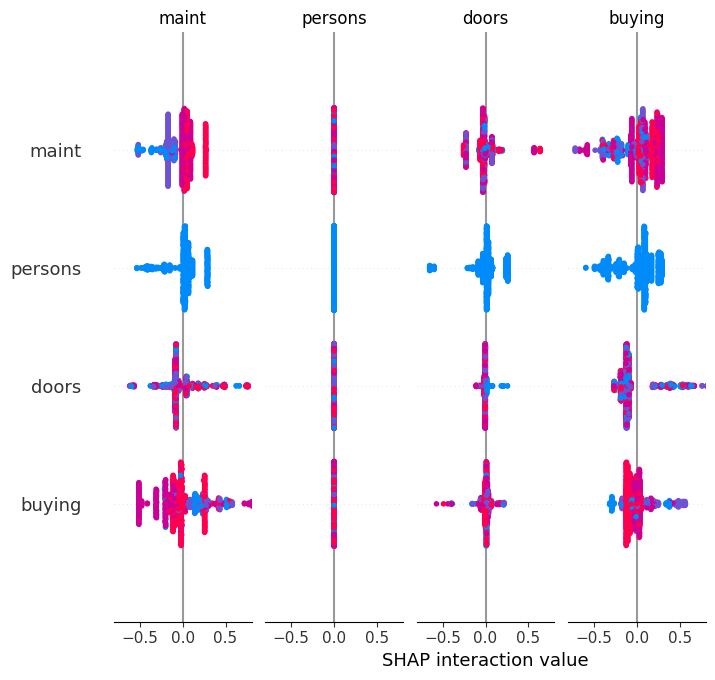

In [ ]:
shap.summary_plot(shap_values,x_test)

In [ ]:
#Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

#Get the class names
class_names = ['acc', 'good', 'unacc', 'vgood']

#Get the feature names I
feature_names = list(x_train.columns)

#Fit the Explainer on the training data set using the LimeTabularExplainer

explainer=LimeTabularExplainer(x_test.values, feature_names =
                               feature_names, class_names = class_names,
                               mode='classification')

In [ ]:
idx = 0

num_explained_labels = 4

#lime_explainer =LimeTextExplainer(class_names = class_names)

explanation=explainer.explain_instance(x_test.iloc[idx],best_par.predict_proba, num_features = 6,top_labels=num_explained_labels)

explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Data Prep

In [ ]:
df = pd.read_csv('car_evaluation.csv')
df.head()

vhigh vhigh.1  2 2.1  small   low  unacc
0  vhigh   vhigh  2   2  small   med  unacc
1  vhigh   vhigh  2   2  small  high  unacc
2  vhigh   vhigh  2   2    med   low  unacc
3  vhigh   vhigh  2   2    med   med  unacc
4  vhigh   vhigh  2   2    med  high  unacc

In [ ]:
col_name = ['buying','maint' ,'doors','persons','lug_boot','safty','class']
df.columns = col_name
col_name

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safty', 'class']

In [ ]:
col_name = ['buying','maint' ,'doors','persons','lug_boot','safty','class']

for col in col_name:
    print(col)
    print(df[col].unique())
    print(df[col].value_counts())

buying
['vhigh' 'high' 'med' 'low']
buying
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
maint
['vhigh' 'high' 'med' 'low']
maint
high     432
med      432
low      432
vhigh    431
Name: count, dtype: int64
doors
['2' '3' '4' '5more']
doors
3        432
4        432
5more    432
2        431
Name: count, dtype: int64
persons
['2' '4' 'more']
persons
4       576
more    576
2       575
Name: count, dtype: int64
lug_boot
['small' 'med' 'big']
lug_boot
med      576
big      576
small    575
Name: count, dtype: int64
safty
['med' 'high' 'low']
safty
med     576
high    576
low     575
Name: count, dtype: int64
class
['unacc' 'acc' 'vgood' 'good']
class
unacc    1209
acc       384
good       69
vgood      65
Name: count, dtype: int64


In [ ]:
x = df.drop(['class'],axis=1)
y = df['class']

In [ ]:
encoder = ce.OrdinalEncoder(cols=['buying','maint' ,'doors','persons','lug_boot','safty'])

x_en = encoder.fit_transform(x)
le = LabelEncoder()
y_en = le.fit_transform(y)
x_train, x_test, y_train, y_test =train_test_split(x_en,y_en,test_size =0.33,random_state =42)

### XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# x_train, x_test, y_train, y_test =train_test_split(x_en,y_en,test_size =0.33,random_state =42)

In [ ]:
# Initialize XGBoost classifier (you can adjust hyperparameters as needed)
model = XGBClassifier()

# Train the model on the training data
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.9824561403508771
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       127
           1       0.82      0.78      0.80        18
           2       1.00      1.00      1.00       399
           3       0.83      0.92      0.87        26

    accuracy                           0.98       570
   macro avg       0.91      0.92      0.91       570
weighted avg       0.98      0.98      0.98       570



In [ ]:
# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

    Feature  Importance
3   persons    0.388716
5     safty    0.268273
0    buying    0.112834
1     maint    0.107749
4  lug_boot    0.091289
2     doors    0.031140


#### Explainable AI

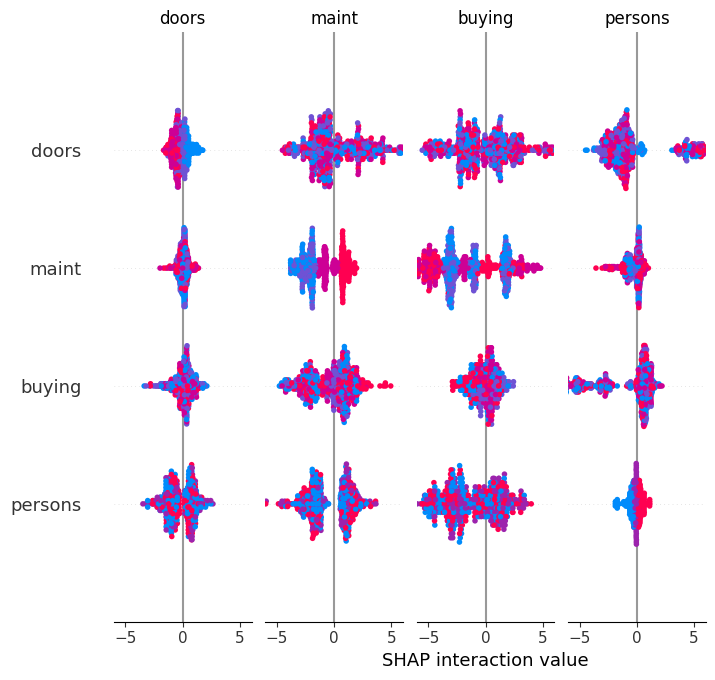

In [ ]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(model)

# Compute SHAP values
shap_values = explainer.shap_values(x_test)

# Plot SHAP summary plot
shap.summary_plot(shap_values, x_test)

In [ ]:
#Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

#Get the class names
class_names = ['acc', 'good', 'unacc', 'vgood']

#Get the feature names I
feature_names = list(x_train.columns)

#Fit the Explainer on the training data set using the LimeTabularExplainer

explainer=LimeTabularExplainer(x_test.values, feature_names =
                               feature_names, class_names = class_names,
                               mode='classification')

In [ ]:
idx = 0

num_explained_labels = 4

# lime_explainer =LimeTextExplainer(class_names = class_names)

explanation=explainer.explain_instance(x_test.iloc[idx],model.predict_proba, num_features = 6,top_labels=num_explained_labels)

explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest model
model = RandomForestClassifier()
model.fit(x_train, y_train)

# Make predictions on the test data
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.9701754385964912
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       127
           1       0.79      0.61      0.69        18
           2       1.00      1.00      1.00       399
           3       0.79      0.85      0.81        26

    accuracy                           0.97       570
   macro avg       0.88      0.85      0.86       570
weighted avg       0.97      0.97      0.97       570



In [ ]:
# Get feature importances
feature_importance = model.feature_importances_

# Create a DataFrame to display feature importance
feature_importance_df = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': feature_importance
})

# Sort the DataFrame by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print(feature_importance_df)

    Feature  Importance
5     safty    0.301072
3   persons    0.239318
0    buying    0.158203
1     maint    0.153408
4  lug_boot    0.086162
2     doors    0.061836


In [ ]:
import shap

import matplotlib.pyplot as plt

#load JS visualization code to notebook
shap.initjs()

#Create the explainer

explainer=shap.TreeExplainer(model)

shap_values=explainer.shap_values(x_test)

Variable Importance Plot Global Interpretation


<Figure size 640x480 with 0 Axes>

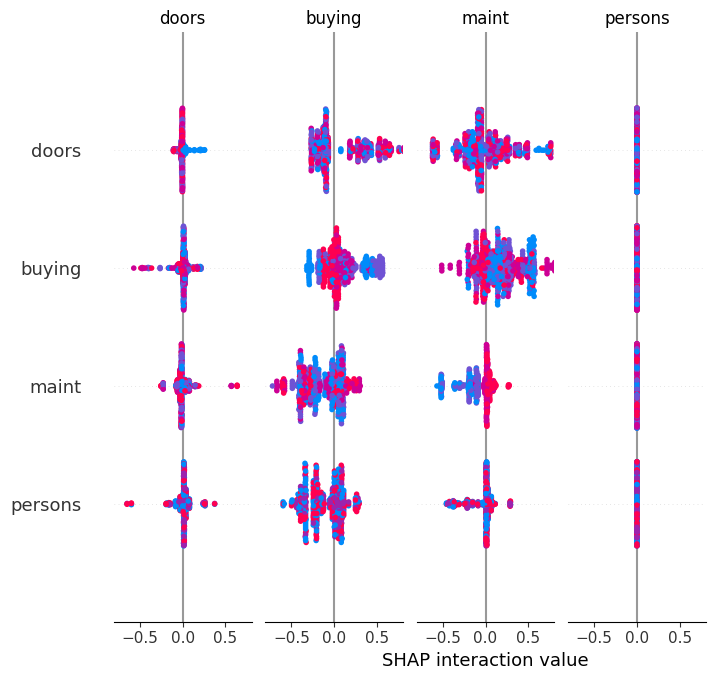

In [ ]:
print("Variable Importance Plot Global Interpretation")

figure=plt.figure()

shap.summary_plot(shap_values, x_test)

In [ ]:
#Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

#Get the class names
class_names = ['acc', 'good', 'unacc', 'vgood']

#Get the feature names I
feature_names = list(x_train.columns)

#Fit the Explainer on the training data set using the LimeTabularExplainer

explainer=LimeTabularExplainer(x_test.values, feature_names =
                               feature_names, class_names = class_names,
                               mode='classification')

In [ ]:
idx = 0

num_explained_labels = 4

# lime_explainer =LimeTextExplainer(class_names = class_names)

explanation=explainer.explain_instance(x_test.iloc[idx],model.predict_proba, num_features = 6,top_labels=num_explained_labels)

explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


#### Bagging Model

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
# Create the base classifier
base_classifier = DecisionTreeClassifier()

# Number of base models (iterations)
n_estimators = 10

# Create the Bagging classifier
model = BaggingClassifier(base_estimator=base_classifier, n_estimators=n_estimators)

# Train the Bagging classifier
model.fit(x_train, y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier())

In [ ]:
# Make predictions on the test set
y_pred = bagging_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Print classification report for detailed evaluation
print(classification_report(y_test, y_pred))

Accuracy: 0.9736842105263158
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       127
           1       0.75      0.83      0.79        18
           2       0.99      1.00      1.00       399
           3       0.91      0.81      0.86        26

    accuracy                           0.97       570
   macro avg       0.90      0.90      0.90       570
weighted avg       0.97      0.97      0.97       570



In [ ]:
dir(model)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_fit',
 '_get_estimators_indices',
 '_get_param_names',
 '_get_tags',
 '_make_estimator',
 '_max_features',
 '_max_samples',
 '_more_tags',
 '_n_samples',
 '_parallel_args',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_required_parameters',
 '_seeds',
 '_set_oob_score',
 '_validate_data',
 '_validate_estimator',
 '_validate_params',
 '_validate_y',
 'base_estimator',
 'base_estimat

In [ ]:
#Import the LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

#Get the class names
class_names = ['acc', 'good', 'unacc', 'vgood']

#Get the feature names I
feature_names = list(x_train.columns)

#Fit the Explainer on the training data set using the LimeTabularExplainer

explainer=LimeTabularExplainer(x_test.values, feature_names =
                               feature_names, class_names = class_names,
                               mode='classification')

In [ ]:
idx = 0

num_explained_labels = 4

# lime_explainer =LimeTextExplainer(class_names = class_names)

explanation=explainer.explain_instance(x_test.iloc[idx],model.predict_proba, num_features = 6,top_labels=num_explained_labels)

explanation.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(
